# Fantasy Football

## Author: Daniel Antantis

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [7]:
names = ['2010','2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
df_list = []
for i in range(len(names)):
    temp_df = pd.read_csv("Yearly/"+names[i]+".csv")
    df_list.append(temp_df)
    df_list[i]['Year'] = names[i]

In [10]:
df_list[0].head(5)

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,...,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost,Year
0,Arian Foster,HOU,RB,24,16,13,84.0,66.0,0.0,0.0,...,1616.0,16.0,327.0,604.0,2.0,392.0,0.0,3.0,2.0,2010
1,Adrian Peterson,MIN,RB,25,15,15,50.0,36.0,0.0,0.0,...,1298.0,12.0,283.0,341.0,1.0,275.9,0.0,1.0,1.0,2010
2,Jamaal Charles,KAN,RB,24,16,6,64.0,45.0,0.0,0.0,...,1467.0,5.0,230.0,468.0,3.0,282.5,0.0,3.0,2.0,2010
3,Peyton Hillis,CLE,RB,24,16,14,77.0,61.0,13.0,0.0,...,1177.0,11.0,270.0,477.0,2.0,294.9,0.0,8.0,5.0,2010
4,Chris Johnson,TEN,RB,25,16,16,57.0,44.0,0.0,0.0,...,1364.0,11.0,316.0,245.0,1.0,272.9,0.0,3.0,2.0,2010


In [15]:
# How many players in the dataset
len(df_list[0])

579

In [19]:
big_df = pd.concat([df_list[0], df_list[1], df_list[2], df_list[3], df_list[4], df_list[5], df_list[6], df_list[7], df_list[8], df_list[9], df_list[10], df_list[11], df_list[12]])
big_df.head(5)

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,...,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost,Year
0,Arian Foster,HOU,RB,24,16,13,84.0,66.0,0.0,0.0,...,1616.0,16.0,327.0,604.0,2.0,392.0,0.0,3.0,2.0,2010
1,Adrian Peterson,MIN,RB,25,15,15,50.0,36.0,0.0,0.0,...,1298.0,12.0,283.0,341.0,1.0,275.9,0.0,1.0,1.0,2010
2,Jamaal Charles,KAN,RB,24,16,6,64.0,45.0,0.0,0.0,...,1467.0,5.0,230.0,468.0,3.0,282.5,0.0,3.0,2.0,2010
3,Peyton Hillis,CLE,RB,24,16,14,77.0,61.0,13.0,0.0,...,1177.0,11.0,270.0,477.0,2.0,294.9,0.0,8.0,5.0,2010
4,Chris Johnson,TEN,RB,25,16,16,57.0,44.0,0.0,0.0,...,1364.0,11.0,316.0,245.0,1.0,272.9,0.0,3.0,2.0,2010


In [27]:
pos_df = big_df.groupby('Pos').mean().reset_index()
pos_df.head(5)

,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,QB,28.402263,8.443416,6.938272,0.309671,0.200617,1707.049383,10.555556,238.682099,99.424897,0.972222,23.635802,1.664609,0.028807,114.016632,5.924897,3.753086,1.645765
1,RB,25.616229,11.615274,4.058711,21.425776,15.984726,0.206683,0.006683,0.036277,304.218616,2.115990,72.112172,126.425776,0.594749,74.877863,0.003820,0.904057,0.582627
2,TE,26.406828,12.808677,6.650071,33.482906,22.083926,0.225462,0.001422,0.024893,1.188478,0.022760,0.273115,243.028450,1.869132,57.786192,0.000711,0.270270,0.177850
3,WR,25.829167,11.980303,5.771212,50.923048,30.727652,1.167045,0.016288,0.124621,10.965152,0.059848,1.818561,399.125000,2.411364,86.653258,0.006439,0.666288,0.341938


In [31]:
qb_df = big_df[big_df['Pos'] == 'QB']
rb_df = big_df[big_df['Pos'] == 'RB']
wr_df = big_df[big_df['Pos'] == 'WR']
te_df = big_df[big_df['Pos'] == 'TE']

## Exploratory Data Analysis

In [20]:
big_df.describe()

,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
count,7913.000000,7913.000000,7913.000000,7774.000000,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,7126.000000,7901.000000,7412.000000,7007.000000
mean,26.171364,10.911917,5.079995,29.171855,18.457859,210.463554,1.305872,29.415211,96.760061,0.704632,22.682106,210.309795,1.299418,80.817331,0.732186,1.046141,0.521336
std,3.311469,5.229051,5.575821,37.326309,24.015962,808.506616,5.370747,110.901890,236.975430,1.953860,53.582980,303.158133,2.280639,85.512277,2.778063,1.996293,1.019686
min,21.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,-31.000000,0.000000,0.000000,-16.000000,0.000000,-7.300000,0.000000,0.000000,0.000000
25%,24.000000,6.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,12.400000,0.000000,0.000000,0.000000
50%,25.000000,13.000000,3.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,71.000000,0.000000,48.800000,0.000000,0.000000,0.000000
75%,28.000000,16.000000,9.000000,45.000000,28.000000,0.000000,0.000000,0.000000,50.000000,0.000000,12.000000,296.000000,2.000000,128.175000,0.000000,1.000000,1.000000
max,45.000000,17.000000,17.000000,204.000000,149.000000,5477.000000,55.000000,733.000000,2097.000000,18.000000,392.000000,1964.000000,18.000000,471.200000,30.000000,19.000000,11.000000


<AxesSubplot:title={'center':'Distribution of Fantasy Points (2010-2022)'}, xlabel='Fantasy Points', ylabel='Count'>

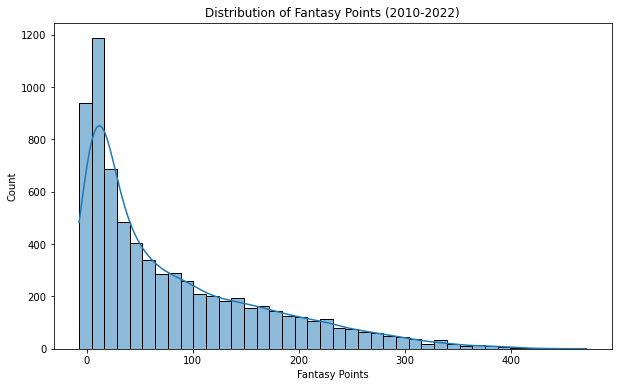

In [23]:
fig = plt.figure(figsize=(10, 6))
plt.xlabel('Fantasy Points')
plt.ylabel('Count')
plt.title('Distribution of Fantasy Points (2010-2022)')
sns.histplot(big_df['FantasyPoints'], kde = True)

The distribution is obviously right-skewed and appears to have a high concentration of players who scored around 0 points.

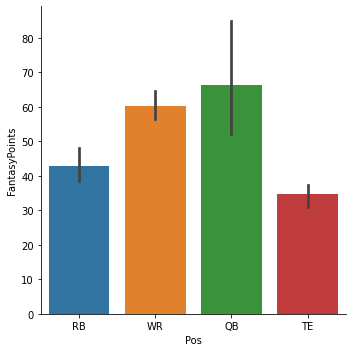

In [55]:
sns.catplot(data=big_df, x="Pos", y="FantasyPoints", kind="bar", estimator = np.median)

Based on the median fantasy points for players in the dataset, quarterbacks and wide recievers score the most fantasy points on average, and running backs and tight ends score much less.

## Receiving

Text(0.5, 1.0, 'Fantasy Points and Receptions')

<Figure size 720x432 with 0 Axes>

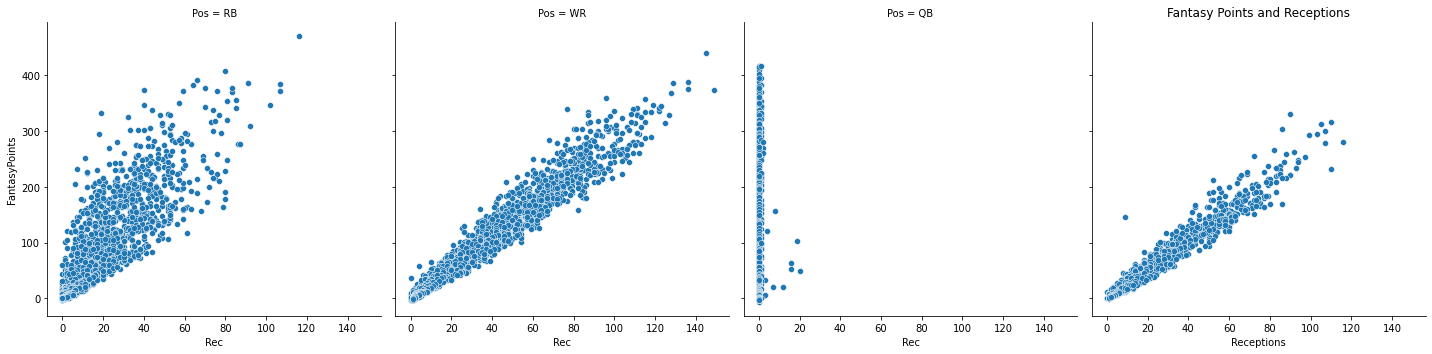

In [45]:
fig = plt.figure(figsize=(10, 6))
sns.relplot(data=big_df, x="Rec", y="FantasyPoints", col="Pos")
plt.xlabel('Receptions')
plt.ylabel('Fantasy Points')
plt.title('Fantasy Points and Receptions by Position')

Because the fantasy points in this dataset are from a Points Per Reception (PPR) format receptions are going to greatly determine the total points a given player has scored. There is an extremely high correlation for both WRs and TEs since this is where the majority of their points come from, but this relationship is not as strong for RBs because they score points in other ways such as rushing TDs and rushing yards. It has almost no effect on QBs since they are usually the player throwing the ball and therefore not catching it.

Text(0.5, 1.0, 'Fantasy Points and Receiving Yards by Position')

<Figure size 720x432 with 0 Axes>

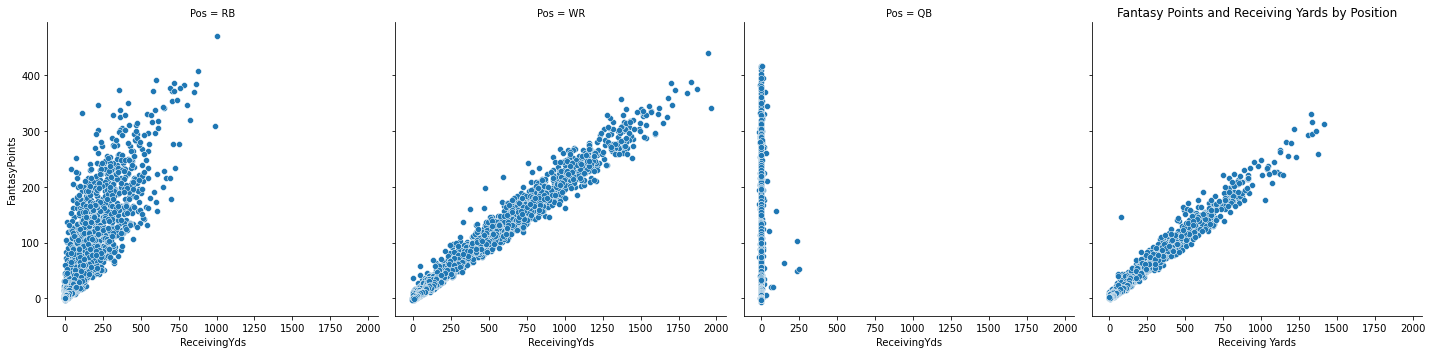

In [56]:
fig = plt.figure(figsize=(10, 6))
sns.relplot(data=big_df, x="ReceivingYds", y="FantasyPoints", col="Pos")
plt.xlabel('Receiving Yards')
plt.ylabel('Fantasy Points')
plt.title('Fantasy Points and Receiving Yards by Position')

Receiving yards has a very similar relationship with fantasy points for each position as receptions did which makes sense since a player needs to make a reception in order to obtain receiving yards.

Text(1090.4499999999998, 0.5, 'Fantasy Points')

<Figure size 720x432 with 0 Axes>

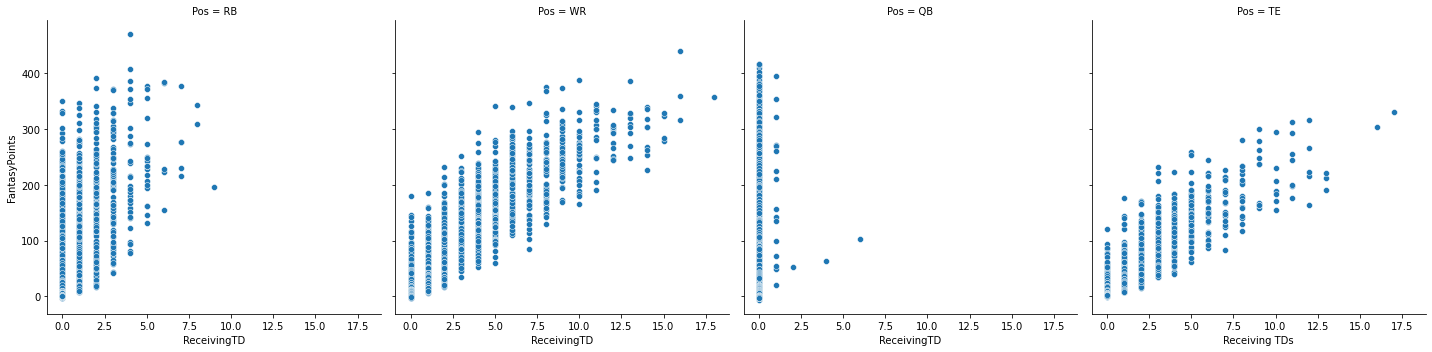

In [64]:
fig = plt.figure(figsize=(10, 6))
sns.relplot(data=big_df, x="ReceivingTD", y="FantasyPoints", col="Pos")
plt.xlabel('Receiving TDs')
plt.ylabel('Fantasy Points')

## Rushing

Text(0.5, 1.0, 'Fantasy Points and Rushing Yards by Position')

<Figure size 720x432 with 0 Axes>

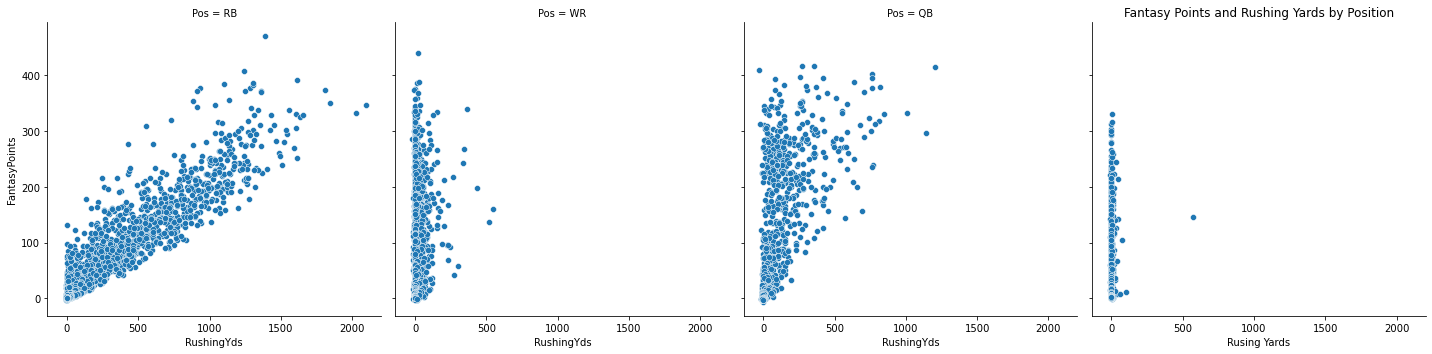

In [65]:
fig = plt.figure(figsize=(10, 6))
sns.relplot(data=big_df, x="RushingYds", y="FantasyPoints", col="Pos")
plt.xlabel('Rusing Yards')
plt.ylabel('Fantasy Points')
plt.title('Fantasy Points and Rushing Yards by Position')

There is a strong relationship between rushing yards and fantasy points for RBs and almost no relationship for WRs and TEs. QBs have a much more complex relationship with rushing yards as there are QBs who rely heavily on their running ability to produce fantasy points, on the other hand, there are also QBs who are not very mobile and don't run but still produce lots of fantasy points through other means.

Text(0.5, 1.0, 'Fantasy Points and Rushing TDs by Position')

<Figure size 720x432 with 0 Axes>

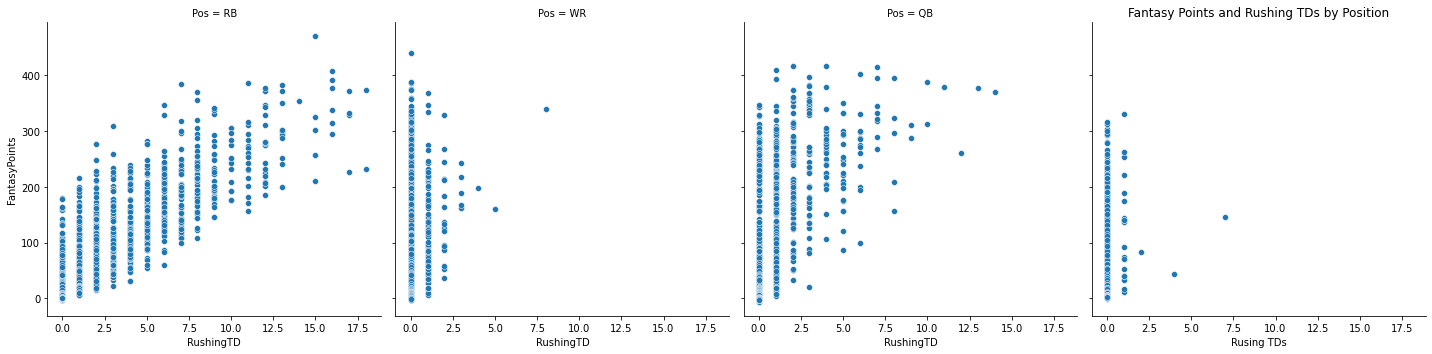

In [66]:
fig = plt.figure(figsize=(10, 6))
sns.relplot(data=big_df, x="RushingTD", y="FantasyPoints", col="Pos")
plt.xlabel('Rusing TDs')
plt.ylabel('Fantasy Points')
plt.title('Fantasy Points and Rushing TDs by Position')

The relationship between rushing TDs and rushing yards almost mirror each other for every position, the only difference is that it is clear more QBs have rushing TDs than they have rushing yards which can be common as teams often run QBs close to the endzone.